In [1]:
import torch
import torchvision
import torch.optim as optim

from torch import nn
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

In [17]:

train_data = torchvision.datasets.MNIST(root='./mnist_data', train=True, transform=transforms.ToTensor(), download=True)
test_data  = torchvision.datasets.MNIST(root='./mnist_data', train=False, transform=transforms.ToTensor(), download=True)

train_load = torch.utils.data.DataLoader(dataset=train_data, shuffle=True, batch_size=32)
test_load  = torch.utils.data.DataLoader(dataset=test_data, shuffle=False, batch_size=32)


config = {
    'learning_rate' : 0.01,
    'optimizer'     : 'adam',
    'epochs'        : 10
}

In [18]:
class Autoencoder(nn.Module):
    
    def __init__(self):
        
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        
        enc = self.encoder(x)
        dec = self.decoder(enc)
        
        return enc, dec
        

def optimizer(model, opt):
    
    if opt.lower() == 'adam':
        optimizer = optim.Adam(model.parameters(), lr = config['learning_rate'])
        
    return optimizer
    

102.479
90.034
89.105
89.81
90.736
91.965
95.553
95.43
96.586
101.659


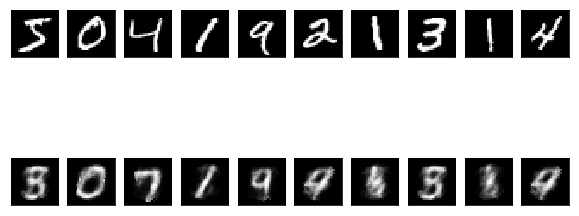

In [19]:

autoencoder = Autoencoder()

optim           = torch.optim.Adam(autoencoder.parameters(), config['learning_rate'])
loss_function   = nn.MSELoss()


for i in range(config['epochs']):

    cost            = 0
    
    for batch_index, data in enumerate(train_load):
        
        digits = data[0].view(len(data[0]), 784)
        target = data[1]
        
        encoded, decoded = autoencoder.forward(digits)
        
        loss = loss_function(decoded, digits)
        cost += loss.item()
        
        optim.zero_grad() # Zero out gradients
        loss.backward()   # Backward pass
        optim.step()      # Apply gradients
        
        
    print(round(cost, 3))
    

f, a = plt.subplots(2, 10, figsize=(10, 5))
plt.ion() 
images = train_data.train_data[:10].type(torch.FloatTensor)

for i in range(10):
    
    a[0][i].imshow(np.reshape(images[i].numpy(), (28,28)), cmap='gray')
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())
    
enc, dec = autoencoder.forward(images.view(-1, 784))
for i in range(10):
    img = dec[i].detach().numpy()
    a[1][i].imshow(np.reshape(img, (28,28)), cmap='gray')
plt.draw(); plt.pause(0.05)